<a href="https://colab.research.google.com/github/mostafa-ja/Data-Mining-fall-2023/blob/main/Data_Mining2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown

file_id = '1quMzXrCUCVTHaVTAT26jO-T_HnhSBxtp'

download_link = f'https://drive.google.com/uc?id={file_id}'
output = 'EX_2.zip'
gdown.download(download_link, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1quMzXrCUCVTHaVTAT26jO-T_HnhSBxtp
To: /content/EX_2.zip
100%|██████████| 125M/125M [00:02<00:00, 43.4MB/s]


'EX_2.zip'

In [2]:
!unzip '/content/EX_2.zip' -d "/content/data/"

Archive:  /content/EX_2.zip
  inflating: /content/data/Answer.rar  
  inflating: /content/data/Q_A.rar   
  inflating: /content/data/Questions.rar  
  inflating: /content/data/U.rar     
  inflating: /content/data/tags.rar  
  inflating: /content/data/user_badge.rar  


In [3]:
!unrar x "/content/data/Answer.rar"
!unrar x "/content/data/Q_A.rar"
!unrar x "/content/data/Questions.rar"
!unrar x "/content/data/U.rar"
!unrar x "/content/data/tags.rar"
!unrar x "/content/data/user_badge.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data/Answer.rar

Extracting  Answer.csv                                                    20% 40% 61% 81%100%  OK 
All OK

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data/Q_A.rar

Extracting  Q_A.csv                                                       29% 59% 88%100%  OK 
All OK

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data/Questions.rar

Extracting  Questions.txt                                                 33% 66% 99%100%  OK 
All OK

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data/U.rar

Extracting  U.csv                                                        100%  OK 
All OK

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
answers = pd.read_csv('Answer.csv', encoding="utf-16")
answers = answers.drop(0) # remove the meaningless row(the second line)
answers.head(3)

,Id,CreationDate,Score,OwnerUserId,CommentCount,ClosedDate
1,127,2008-08-01 16:13:47.600000000,37.0,35.0,2.0,NaN
2,128,2008-08-01 16:19:04.283000000,7.0,26.0,2.0,NaN
3,133,2008-08-01 16:31:43.430000000,0.0,59.0,1.0,NaN


In [6]:
questions = pd.read_csv('Questions.txt', encoding="utf-16")
questions.head(3)

,Id,CreationDate,Score,ViewCount,OwnerUserId,CommentCount,ClosedDate,FavoriteCount
0,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13
1,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2
2,382,2008-08-02 08:58:28,28,6827,122.0,1,NaN,4


In [7]:
Q_A = pd.read_csv('Q_A.csv', encoding="utf-16")
Q_A.head(3)

,QId,AId,accepted
0,898405,1153025,0
1,12679343,12679433,0
2,19108614,19786664,0


In [8]:
users = pd.read_csv('U.csv', encoding="utf-16")
users.head(3)

,Id,Reputation,Views,UpVotes,DownVotes
0,1,33107,173080,3225,1299
1,3,10145,18988,5654,100
2,9,8716,3152,42,4


In [9]:
user_badge = pd.read_csv('user_badge.txt', encoding="utf-16")
user_badge.head(3)

,UserId,Name
0,3718,Teacher
1,994,Teacher
2,3893,Teacher


In [10]:
tags = pd.read_csv('tags.txt', sep='\t')
tags.head(3)

,Id,Tags
0,2288942,user-interface
1,4433442,canvas
2,6381190,shortcut


In [11]:
len(questions)

810071

# Question 1

In [12]:
merged_Q_A = pd.merge(questions, Q_A, left_on='Id', right_on='QId', how='inner')
merged_Q_A.head(3)

,Id,CreationDate,Score,ViewCount,OwnerUserId,CommentCount,ClosedDate,FavoriteCount,QId,AId,accepted
0,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,183,1
1,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,53547,0
2,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,16483567,0


In [13]:
# Grouping by 'Id' and checking if 'accepted' has at least one value equal to 1
accepted_flag = merged_Q_A.groupby('Id')['accepted'].any().astype(int)
accepted_flag

Id
123         1
126         1
382         1
564         1
2092        0
           ..
28922872    0
28922876    0
28922893    0
28922910    0
28922922    0
Name: accepted, Length: 810071, dtype: int64

In [14]:
questions['accepted_flag'] = accepted_flag

In [15]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = questions['accepted_flag'].corr(questions['ViewCount'])
correlation

0.020188106238256856

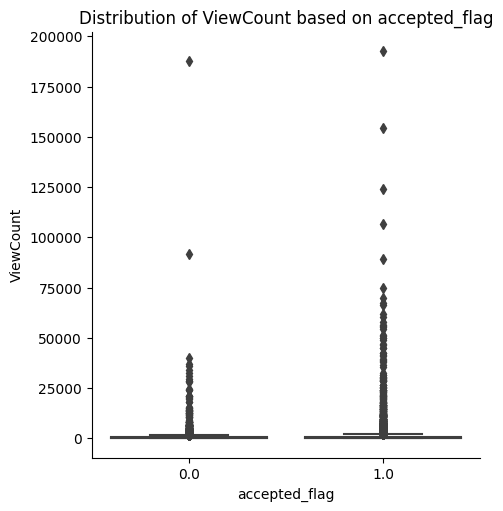

In [16]:
# Using a categorical plot or boxplot to visualize 'ViewCount' based on 'accepted' values
sns.catplot(x='accepted_flag', y='ViewCount', data=questions, kind='box')
plt.title('Distribution of ViewCount based on accepted_flag')
plt.xlabel('accepted_flag')
plt.ylabel('ViewCount')
plt.show()

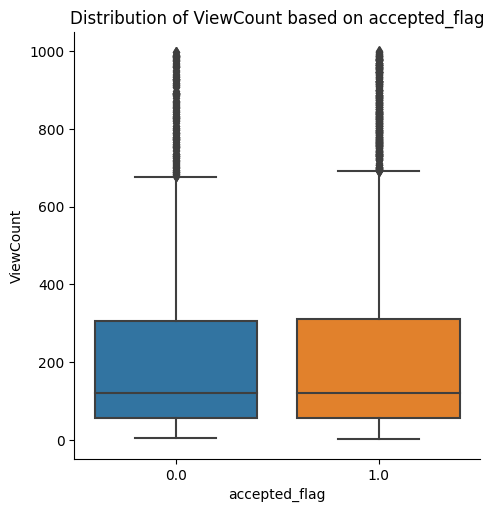

In [21]:
# Using a categorical plot or boxplot to visualize 'ViewCount' based on 'accepted' values
sns.catplot(x='accepted_flag', y='ViewCount', data=questions[questions['ViewCount']<1000], kind='box')
plt.title('Distribution of ViewCount based on accepted_flag')
plt.xlabel('accepted_flag')
plt.ylabel('ViewCount')
plt.show()

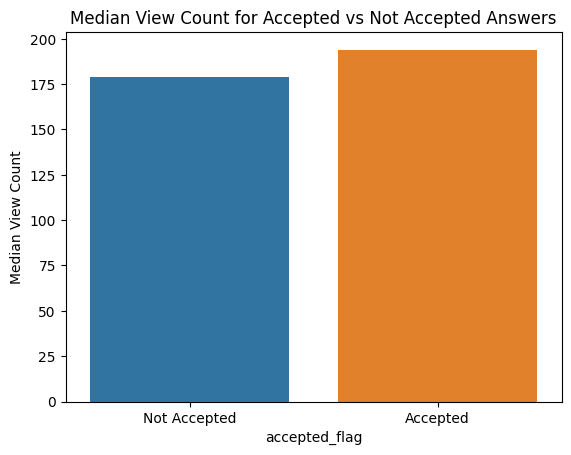

In [22]:
# Grouping by 'accepted' and calculating median view count
median_view_count = questions.groupby('accepted_flag')['ViewCount'].median()

# Creating a bar plot for median view count of accepted vs not accepted answers
sns.barplot(x=median_view_count.index.map({1: 'Accepted', 0: 'Not Accepted'}), y=median_view_count.values)
plt.ylabel('Median View Count')
plt.title('Median View Count for Accepted vs Not Accepted Answers')
plt.show()


# Question 2

In [23]:
questions.columns

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'OwnerUserId',
       'CommentCount', 'ClosedDate', 'FavoriteCount', 'accepted_flag'],
      dtype='object')

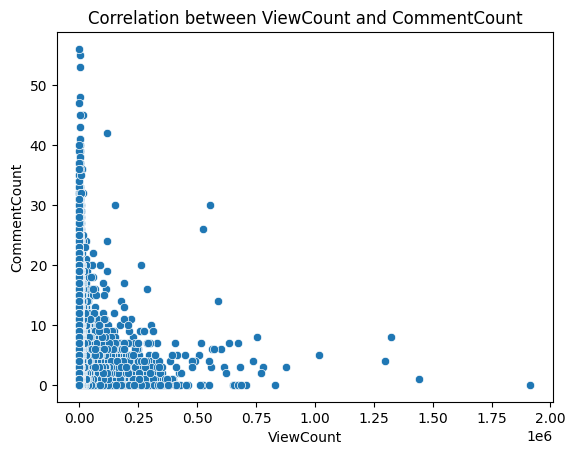

In [24]:
# Plotting correlation between Column1 and Column2
sns.scatterplot(x='ViewCount', y='CommentCount', data=questions)
plt.title('Correlation between ViewCount and CommentCount')
plt.xlabel('ViewCount')
plt.ylabel('CommentCount')
plt.show()

In [25]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = questions['CommentCount'].corr(questions['ViewCount'])
correlation

-0.007876112266719859

# Question 3

In [26]:
questions.columns

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'OwnerUserId',
       'CommentCount', 'ClosedDate', 'FavoriteCount', 'accepted_flag'],
      dtype='object')

In [27]:
answers.columns

Index(['Id', 'CreationDate', 'Score', 'OwnerUserId', 'CommentCount',
       'ClosedDate'],
      dtype='object')

In [28]:
merged_A_Q = pd.merge(answers, Q_A, left_on='Id', right_on='AId', how='inner')
merged_A_Q = pd.merge(merged_A_Q, questions, left_on='QId', right_on='Id', how='inner',suffixes=('_A', '_Q'))
merged_A_Q.head()

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,CreationDate_Q,Score_Q,ViewCount,OwnerUserId_Q,CommentCount_Q,ClosedDate_Q,FavoriteCount,accepted_flag
0,127,2008-08-01 16:13:47.600000000,37.0,35.0,2.0,NaN,126,127,1,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN
1,128,2008-08-01 16:19:04.283000000,7.0,26.0,2.0,NaN,126,128,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN
2,139,2008-08-01 16:43:30.880000000,5.0,72.0,0.0,NaN,126,139,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN
3,142,2008-08-01 16:56:55.830000000,2.0,42.0,0.0,NaN,126,142,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN
4,143,2008-08-01 17:01:27.240000000,3.0,86.0,0.0,NaN,126,143,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN


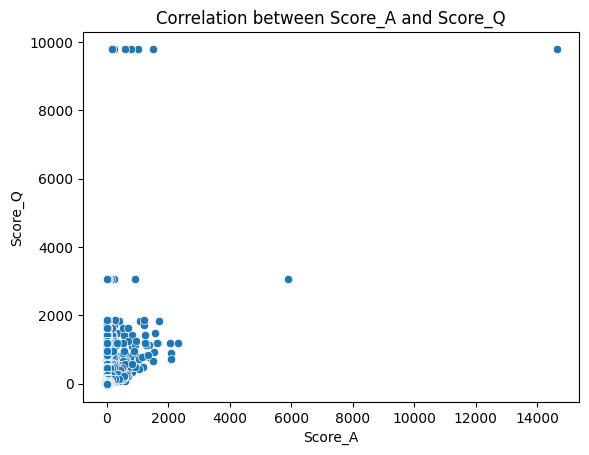

In [29]:
# Plotting correlation between Column1 and Column2
sns.scatterplot(x='Score_A', y='Score_Q', data=merged_A_Q)
plt.title('Correlation between Score_A and Score_Q')
plt.xlabel('Score_A')
plt.ylabel('Score_Q')
plt.show()

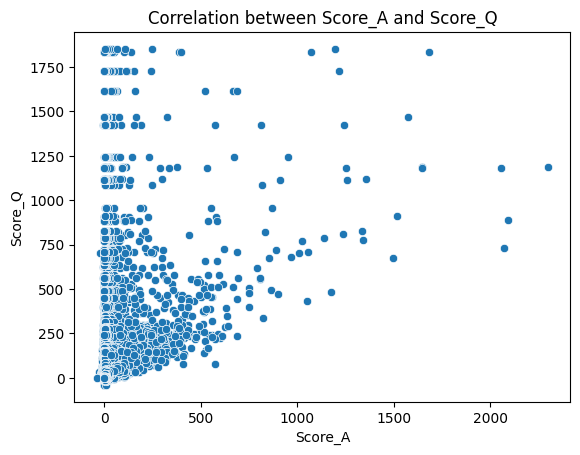

In [30]:
# Plotting correlation between Column1 and Column2
sns.scatterplot(x='Score_A', y='Score_Q', data=merged_A_Q[merged_A_Q['Score_Q']<3000])
plt.title('Correlation between Score_A and Score_Q')
plt.xlabel('Score_A')
plt.ylabel('Score_Q')
plt.show()

In [31]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = merged_A_Q['Score_A'].corr(merged_A_Q['Score_Q'])
correlation

0.3633855098600879

# Question 4

In [32]:
merged_A_Q.columns

Index(['Id_A', 'CreationDate_A', 'Score_A', 'OwnerUserId_A', 'CommentCount_A',
       'ClosedDate_A', 'QId', 'AId', 'accepted', 'Id_Q', 'CreationDate_Q',
       'Score_Q', 'ViewCount', 'OwnerUserId_Q', 'CommentCount_Q',
       'ClosedDate_Q', 'FavoriteCount', 'accepted_flag'],
      dtype='object')

In [33]:
users.columns

Index(['Id', 'Reputation', 'Views', 'UpVotes', 'DownVotes'], dtype='object')

In [34]:
merged_U_A_Q = pd.merge(users, merged_A_Q, left_on='Id', right_on='OwnerUserId_A', how='inner')
merged_U_A_Q.head()

,Id,Reputation,Views,UpVotes,DownVotes,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,...,accepted,Id_Q,CreationDate_Q,Score_Q,ViewCount,OwnerUserId_Q,CommentCount_Q,ClosedDate_Q,FavoriteCount,accepted_flag
0,1,33107,173080,3225,1299,50544,2008-09-08 20:04:18.290000000,37.0,1.0,3.0,...,0,50532,2008-09-08 19:59:45,54,123939,1310.0,0,NaN,8,NaN
1,1,33107,173080,3225,1299,284016,2008-11-12 14:02:14.047000000,3.0,1.0,0.0,...,0,283965,2008-11-12 13:46:22,2,1250,36906.0,0,NaN,0,NaN
2,3,10145,18988,5654,100,293331,2008-11-16 01:21:28.770000000,0.0,3.0,1.0,...,0,292830,2008-11-15 17:54:28,4,342,3305.0,2,NaN,1,NaN
3,9,8716,3152,42,4,35045,2008-08-29 19:02:09.180000000,3.0,9.0,1.0,...,0,35002,2008-08-29 18:47:23,54,14260,1853.0,1,NaN,22,NaN
4,13,116651,18843,4714,187,608,2008-08-03 02:32:50.690000000,16.0,13.0,1.0,...,0,564,2008-08-02 21:47:35,101,84452,25.0,2,NaN,35,NaN


In [35]:
merged_U_A_Q.columns

Index(['Id', 'Reputation', 'Views', 'UpVotes', 'DownVotes', 'Id_A',
       'CreationDate_A', 'Score_A', 'OwnerUserId_A', 'CommentCount_A',
       'ClosedDate_A', 'QId', 'AId', 'accepted', 'Id_Q', 'CreationDate_Q',
       'Score_Q', 'ViewCount', 'OwnerUserId_Q', 'CommentCount_Q',
       'ClosedDate_Q', 'FavoriteCount', 'accepted_flag'],
      dtype='object')

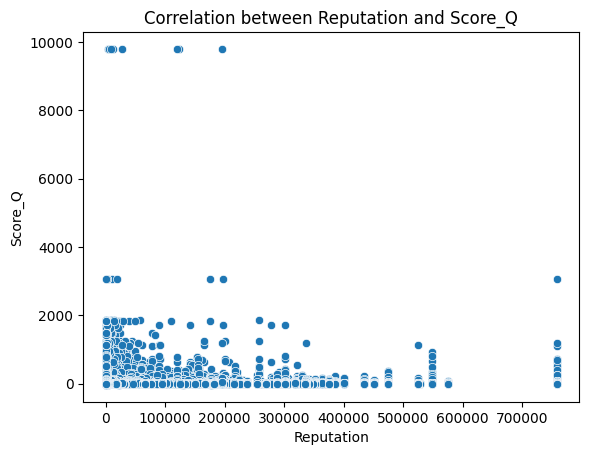

In [36]:
# Plotting correlation between Column1 and Column2
sns.scatterplot(x='Reputation', y='Score_Q', data=merged_U_A_Q)
plt.title('Correlation between Reputation and Score_Q')
plt.xlabel('Reputation')
plt.ylabel('Score_Q')
plt.show()

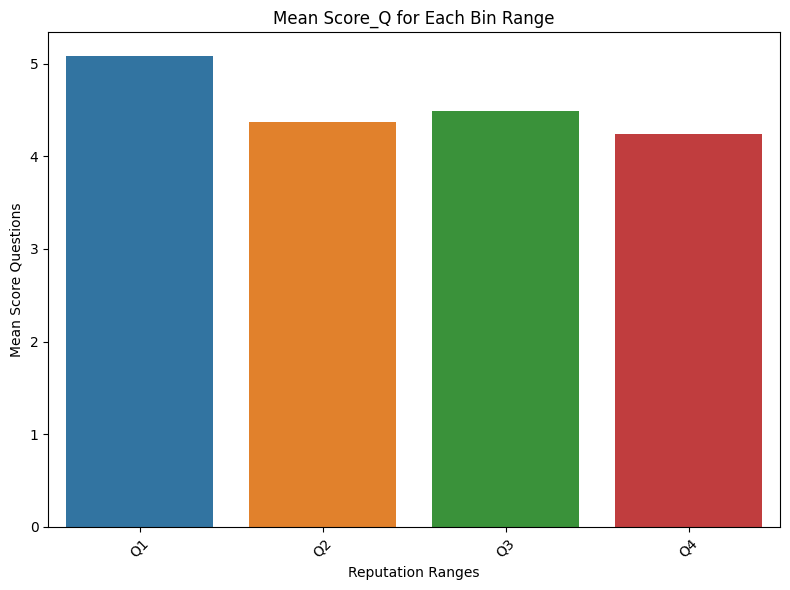

In [37]:
# Define bins and calculate mean scores for each bin
merged_U_A_Q['Bin'] = pd.qcut(merged_U_A_Q['Reputation'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
mean_scores = merged_U_A_Q.groupby('Bin')['Score_Q'].mean()

# Plotting with mean scores on the y-axis
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title('Mean Score_Q for Each Bin Range')
plt.xlabel('Reputation Ranges')
plt.ylabel('Mean Score Questions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [38]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = merged_U_A_Q['Reputation'].corr(merged_U_A_Q['Score_Q'])
correlation

-0.001712069985908856

# Question 5

In [39]:
merged_U_A_Q['ClosedDate_Q']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1503482    NaN
1503483    NaN
1503484    NaN
1503485    NaN
1503486    NaN
Name: ClosedDate_Q, Length: 1503487, dtype: object

In [40]:
merged_U_A_Q['Closed_Q'] = merged_U_A_Q['ClosedDate_Q'].notnull().astype(int)
merged_U_A_Q['Closed_Q']

0          0
1          0
2          0
3          0
4          0
          ..
1503482    0
1503483    0
1503484    0
1503485    0
1503486    0
Name: Closed_Q, Length: 1503487, dtype: int64

In [ ]:
sum(merged_U_A_Q['Closed_Q'])

105685

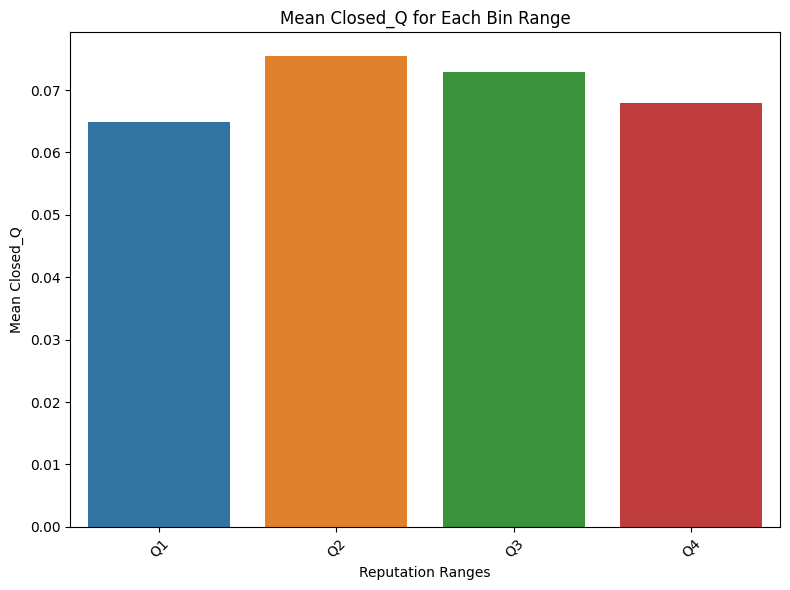

In [41]:
# Define bins and calculate mean scores for each bin
merged_U_A_Q['Bin'] = pd.qcut(merged_U_A_Q['Reputation'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
mean_scores = merged_U_A_Q.groupby('Bin')['Closed_Q'].mean()

# Plotting with mean scores on the y-axis
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title('Mean Closed_Q for Each Bin Range')
plt.xlabel('Reputation Ranges')
plt.ylabel('Mean Closed_Q')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [42]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = merged_U_A_Q['Reputation'].corr(merged_U_A_Q['Closed_Q'])
correlation

-0.01217427243769536

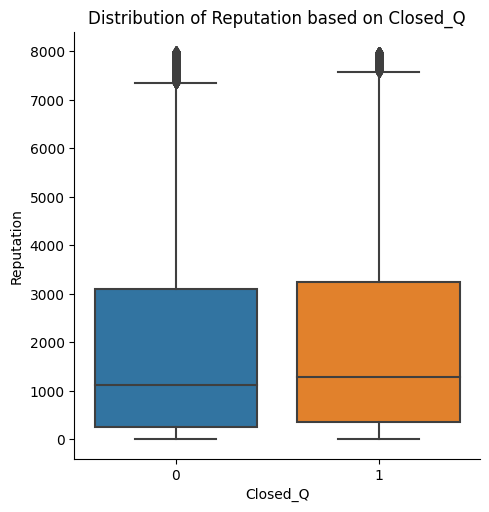

In [43]:
# Using a categorical plot or boxplot to visualize 'ViewCount' based on 'accepted' values
sns.catplot(x='Closed_Q', y='Reputation', data=merged_U_A_Q[merged_U_A_Q['Reputation']<8000], kind='box')
plt.title('Distribution of Reputation based on Closed_Q')
plt.xlabel('Closed_Q')
plt.ylabel('Reputation')
plt.show()

# Question 6

In [44]:
users.columns

Index(['Id', 'Reputation', 'Views', 'UpVotes', 'DownVotes'], dtype='object')

In [45]:
user_badge

,UserId,Name
0,3718,Teacher
1,994,Teacher
2,3893,Teacher
3,4591,Teacher
4,5196,Teacher
...,...,...
12783304,649306,Yearling
12783305,2147188,Yearling
12783306,75204,Yearling
12783307,391865,Yearling


In [46]:
user_badge.groupby('UserId').count()

,Name
UserId,
1,298
2,72
3,109
4,165
5,284
...,...
4645953,1
4645962,1
4645964,1


In [47]:
badge_count = user_badge.groupby('UserId').size().reset_index(name='badgeCount')
badge_count

,UserId,badgeCount
0,1,298
1,2,72
2,3,109
3,4,165
4,5,284
...,...,...
2094762,4645953,1
2094763,4645962,1
2094764,4645964,1
2094765,4645973,1


In [48]:
merged_U_B = pd.merge(users, badge_count, left_on='Id', right_on='UserId', how='inner')
merged_U_B.head()

,Id,Reputation,Views,UpVotes,DownVotes,UserId,badgeCount
0,1,33107,173080,3225,1299,1,298
1,3,10145,18988,5654,100,3,109
2,9,8716,3152,42,4,9,76
3,13,116651,18843,4714,187,13,552
4,17,33462,3708,874,210,17,210


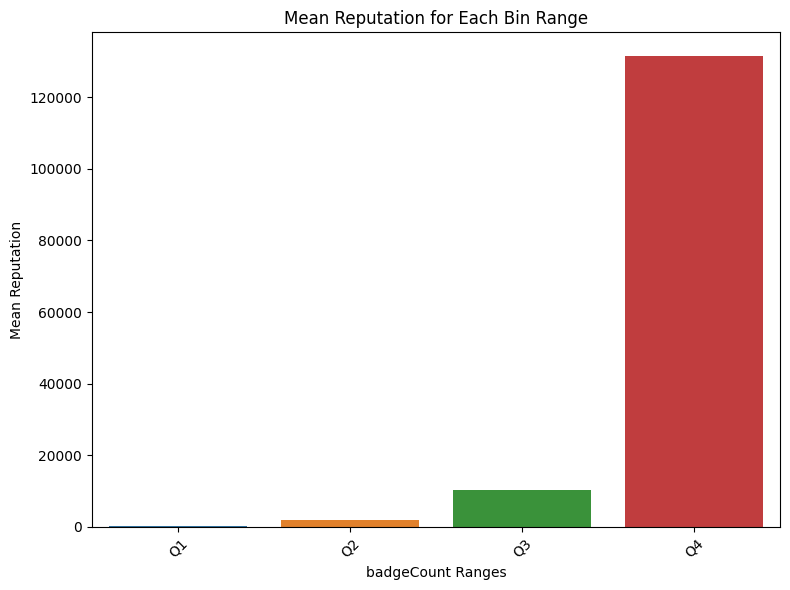

In [49]:
# Define bins and calculate mean scores for each bin
merged_U_B['Bin'] = pd.qcut(merged_U_B['badgeCount'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
mean_scores = merged_U_A_Q.groupby('Bin')['Reputation'].mean()

# Plotting with mean scores on the y-axis
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title('Mean Reputation for Each Bin Range')
plt.xlabel('badgeCount Ranges')
plt.ylabel('Mean Reputation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = merged_U_B['badgeCount'].corr(merged_U_B['Reputation'])
correlation

0.7886761919628325

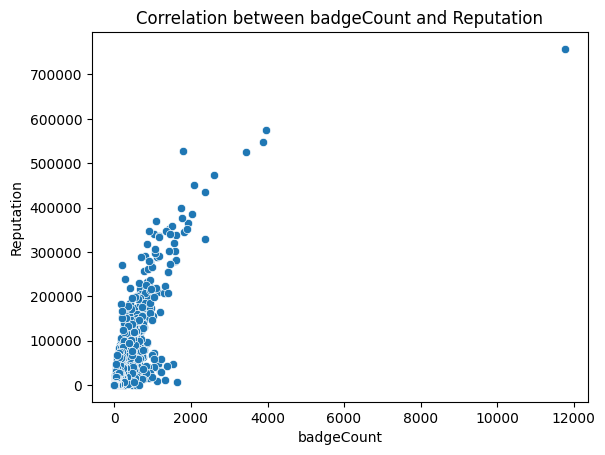

In [51]:
# Plotting correlation between Column1 and Column2
sns.scatterplot(x='badgeCount', y='Reputation', data=merged_U_B)
plt.title('Correlation between badgeCount and Reputation')
plt.xlabel('badgeCount')
plt.ylabel('Reputation')
plt.show()

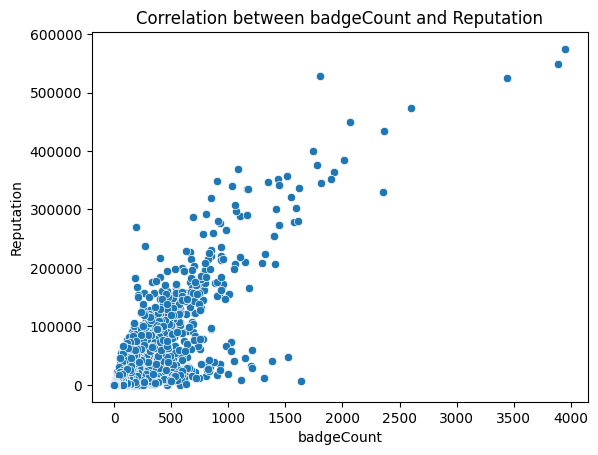

In [52]:
# Plotting correlation between Column1 and Column2
sns.scatterplot(x='badgeCount', y='Reputation', data=merged_U_B[merged_U_B['badgeCount']<5000])
plt.title('Correlation between badgeCount and Reputation')
plt.xlabel('badgeCount')
plt.ylabel('Reputation')
plt.show()

# Question 7

In [53]:
answers.columns

Index(['Id', 'CreationDate', 'Score', 'OwnerUserId', 'CommentCount',
       'ClosedDate'],
      dtype='object')

In [54]:
questions.columns

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'OwnerUserId',
       'CommentCount', 'ClosedDate', 'FavoriteCount', 'accepted_flag'],
      dtype='object')

In [55]:
merged_A_Q = pd.merge(answers, Q_A, left_on='Id', right_on='AId', how='inner')
merged_A_Q = pd.merge(merged_A_Q, questions, left_on='QId', right_on='Id', how='inner',suffixes=('_A', '_Q'))
merged_A_Q

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,CreationDate_Q,Score_Q,ViewCount,OwnerUserId_Q,CommentCount_Q,ClosedDate_Q,FavoriteCount,accepted_flag
0,127,2008-08-01 16:13:47.600000000,37.0,35.0,2.0,NaN,126,127,1,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN
1,128,2008-08-01 16:19:04.283000000,7.0,26.0,2.0,NaN,126,128,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN
2,139,2008-08-01 16:43:30.880000000,5.0,72.0,0.0,NaN,126,139,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN
3,142,2008-08-01 16:56:55.830000000,2.0,42.0,0.0,NaN,126,142,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN
4,143,2008-08-01 17:01:27.240000000,3.0,86.0,0.0,NaN,126,143,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510807,28922850,2015-03-08 03:48:52.953000000,0.0,2453732.0,0.0,NaN,28831375,28922850,0,28831375,2015-03-03 12:03:39,1,16,1824521.0,0,NaN,1,NaN
1510808,28922863,2015-03-08 03:51:31.997000000,0.0,3466219.0,0.0,NaN,28922554,28922863,0,28922554,2015-03-08 02:51:24,1,13,4645731.0,1,NaN,0,NaN
1510809,28922900,2015-03-08 03:57:28.503000000,0.0,315129.0,1.0,NaN,28922872,28922900,0,28922872,2015-03-08 03:53:09,0,15,4113542.0,0,NaN,0,NaN
1510810,28922940,2015-03-08 04:03:09.810000000,0.0,1195383.0,0.0,NaN,28922872,28922940,0,28922872,2015-03-08 03:53:09,0,15,4113542.0,0,NaN,0,NaN


In [56]:
merged_A_Q['accepted_flag'] = merged_A_Q['accepted_flag'].notnull().astype(int)
merged_A_Q

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,CreationDate_Q,Score_Q,ViewCount,OwnerUserId_Q,CommentCount_Q,ClosedDate_Q,FavoriteCount,accepted_flag
0,127,2008-08-01 16:13:47.600000000,37.0,35.0,2.0,NaN,126,127,1,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,0
1,128,2008-08-01 16:19:04.283000000,7.0,26.0,2.0,NaN,126,128,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,0
2,139,2008-08-01 16:43:30.880000000,5.0,72.0,0.0,NaN,126,139,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,0
3,142,2008-08-01 16:56:55.830000000,2.0,42.0,0.0,NaN,126,142,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,0
4,143,2008-08-01 17:01:27.240000000,3.0,86.0,0.0,NaN,126,143,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510807,28922850,2015-03-08 03:48:52.953000000,0.0,2453732.0,0.0,NaN,28831375,28922850,0,28831375,2015-03-03 12:03:39,1,16,1824521.0,0,NaN,1,0
1510808,28922863,2015-03-08 03:51:31.997000000,0.0,3466219.0,0.0,NaN,28922554,28922863,0,28922554,2015-03-08 02:51:24,1,13,4645731.0,1,NaN,0,0
1510809,28922900,2015-03-08 03:57:28.503000000,0.0,315129.0,1.0,NaN,28922872,28922900,0,28922872,2015-03-08 03:53:09,0,15,4113542.0,0,NaN,0,0
1510810,28922940,2015-03-08 04:03:09.810000000,0.0,1195383.0,0.0,NaN,28922872,28922940,0,28922872,2015-03-08 03:53:09,0,15,4113542.0,0,NaN,0,0


In [57]:
merged_A_Q[merged_A_Q['accepted_flag']==1]

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,CreationDate_Q,Score_Q,ViewCount,OwnerUserId_Q,CommentCount_Q,ClosedDate_Q,FavoriteCount,accepted_flag
965,24867,2008-08-24 05:50:46.703000000,1.0,2617.0,0.0,NaN,24866,24867,0,24866,2008-08-24 05:48:22,11,672,184.0,0,NaN,0,1
966,24869,2008-08-24 05:54:22.263000000,3.0,2150.0,0.0,NaN,24866,24869,0,24866,2008-08-24 05:48:22,11,672,184.0,0,NaN,0,1
967,24872,2008-08-24 05:56:11.637000000,2.0,1965.0,0.0,NaN,24866,24872,0,24866,2008-08-24 05:48:22,11,672,184.0,0,NaN,0,1
968,24894,2008-08-24 07:00:29.797000000,0.0,699.0,0.0,NaN,24866,24894,0,24866,2008-08-24 05:48:22,11,672,184.0,0,NaN,0,1
969,24897,2008-08-24 07:03:28.510000000,0.0,518.0,1.0,NaN,24866,24897,0,24866,2008-08-24 05:48:22,11,672,184.0,0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510315,28913367,2015-03-07 09:31:48.867000000,1.0,2987273.0,0.0,NaN,28912871,28913367,0,28912871,2015-03-07 08:22:41,0,60,1612078.0,10,NaN,0,1
1510316,28913443,2015-03-07 09:42:12.237000000,2.0,3617752.0,1.0,NaN,28912871,28913443,1,28912871,2015-03-07 08:22:41,0,60,1612078.0,10,NaN,0,1
1510317,28913580,2015-03-07 09:56:08.607000000,1.0,821786.0,1.0,NaN,28912871,28913580,0,28912871,2015-03-07 08:22:41,0,60,1612078.0,10,NaN,0,1
1510318,28913588,2015-03-07 09:56:42.643000000,0.0,1803853.0,0.0,NaN,28912871,28913588,0,28912871,2015-03-07 08:22:41,0,60,1612078.0,10,NaN,0,1


In [ ]:
merged_A_Q.columns

Index(['Id_A', 'CreationDate_A', 'Score_A', 'OwnerUserId_A', 'CommentCount_A',
       'ClosedDate_A', 'QId', 'AId', 'accepted', 'Id_Q', 'CreationDate_Q',
       'Score_Q', 'ViewCount', 'OwnerUserId_Q', 'CommentCount_Q',
       'ClosedDate_Q', 'FavoriteCount', 'accepted_flag'],
      dtype='object')

In [58]:
merged_A_Q['CreationDate_A'] = pd.to_datetime(merged_A_Q['CreationDate_A'])

In [59]:
merged_A_Q['CreationDate_Q'] = pd.to_datetime(merged_A_Q['CreationDate_Q'])

In [60]:
merged_A_Q['timeDiffrence(Hours)'] = (merged_A_Q['CreationDate_A'] - merged_A_Q['CreationDate_Q']).dt.total_seconds() / 60 / 60 #based on hours


In [ ]:
merged_A_Q['timeDiffrence(Hours)']

0            0.054889
1            0.142856
2            0.550244
3            0.773842
4            0.849233
              ...    
1510807    111.753876
1510808      1.002221
1510809      0.072084
1510810      0.166892
1510811      0.159475
Name: timeDiffrence(Hours), Length: 1510812, dtype: float64

In [61]:
merged_A_Q['timeDiffrence(Hours)'].min()

-27740.479914722222

In [ ]:
merged_A_Q[merged_A_Q['timeDiffrence(Hours)']<0]

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,CreationDate_Q,Score_Q,ViewCount,OwnerUserId_Q,CommentCount_Q,ClosedDate_Q,FavoriteCount,accepted_flag,timeDiffrence(Hours)
2857,57133,2008-09-11 17:26:43.650,4.0,5469.0,0.0,NaN,462923,57133,0,462923,2009-01-20 20:17:09,46,46929,41283.0,2,2014-01-12 11:13:06,26,0,-3146.840375
2858,57134,2008-09-11 17:26:52.853,7.0,4926.0,0.0,NaN,462923,57134,0,462923,2009-01-20 20:17:09,46,46929,41283.0,2,2014-01-12 11:13:06,26,0,-3146.837819
2859,57143,2008-09-11 17:33:14.463,8.0,2961.0,2.0,NaN,462923,57143,0,462923,2009-01-20 20:17:09,46,46929,41283.0,2,2014-01-12 11:13:06,26,0,-3146.731816
2860,57352,2008-09-11 19:03:59.330,20.0,5077.0,0.0,NaN,462923,57352,0,462923,2009-01-20 20:17:09,46,46929,41283.0,2,2014-01-12 11:13:06,26,0,-3145.219353
2861,58612,2008-09-12 10:19:01.440,2.0,518.0,0.0,NaN,462923,58612,0,462923,2009-01-20 20:17:09,46,46929,41283.0,2,2014-01-12 11:13:06,26,0,-3129.968767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505554,28808835,2015-03-02 11:35:10.810,0.0,3199595.0,0.0,NaN,28808834,28808835,0,28808834,2015-03-02 11:35:11,0,15,3199595.0,0,NaN,0,0,-0.000053
1506010,28818519,2015-03-02 20:04:38.533,7.0,963076.0,0.0,NaN,28818518,28818519,1,28818518,2015-03-02 20:04:39,0,61,963076.0,2,NaN,1,0,-0.000130
1507053,28841323,2015-03-03 20:29:48.630,-1.0,2035405.0,7.0,NaN,28841322,28841323,0,28841322,2015-03-03 20:29:49,0,50,2035405.0,2,NaN,0,0,-0.000103
1507325,28846803,2015-03-04 04:44:42.827,3.0,1345655.0,0.0,NaN,28846802,28846803,0,28846802,2015-03-04 04:44:43,2,16,1345655.0,0,NaN,2,0,-0.000048


In [62]:
df = merged_A_Q[merged_A_Q['timeDiffrence(Hours)']>0]

In [63]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = df['timeDiffrence(Hours)'].corr(df['accepted_flag'])
correlation

-0.005583498055428718

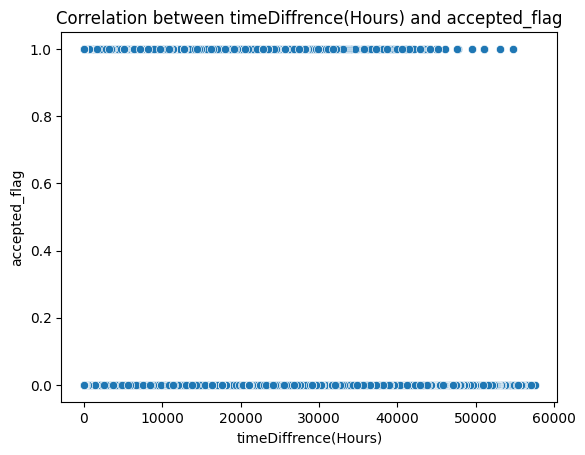

In [64]:
# Plotting correlation between Column1 and Column2
sns.scatterplot(x='timeDiffrence(Hours)', y='accepted_flag', data=df)
plt.title('Correlation between timeDiffrence(Hours) and accepted_flag')
plt.xlabel('timeDiffrence(Hours)')
plt.ylabel('accepted_flag')
plt.show()

In [ ]:
df2 = df[df['timeDiffrence(Hours)']>10000]
df2[df2['accepted_flag']==1]

In [ ]:
len(df2[df2['accepted_flag']==1])

575

In [ ]:
len(df)

1510216

<ipython-input-67-bea55467a172>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bin'] = pd.cut(df['timeDiffrence(Hours)'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


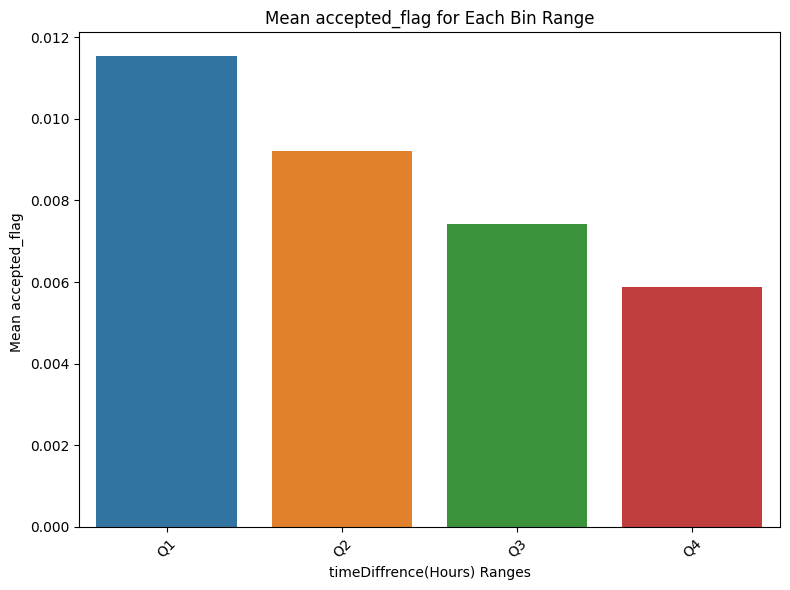

In [67]:
# Define bins and calculate mean scores for each bin
df['Bin'] = pd.cut(df['timeDiffrence(Hours)'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
mean_scores = df.groupby('Bin')['accepted_flag'].mean()

# Plotting with mean scores on the y-axis
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title('Mean accepted_flag for Each Bin Range')
plt.xlabel('timeDiffrence(Hours) Ranges')
plt.ylabel('Mean accepted_flag ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Question 8

In [ ]:
questions.columns

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'OwnerUserId',
       'CommentCount', 'ClosedDate', 'FavoriteCount', 'accepted_flag'],
      dtype='object')

In [ ]:
Q_A.columns

Index(['QId', 'AId', 'accepted'], dtype='object')

In [ ]:
Q_A['AId']

0           1153025
1          12679433
2          19786664
3          22336776
4          28785148
             ...   
1599710          -1
1599711          -1
1599712          -1
1599713          -1
1599714          -1
Name: AId, Length: 1599715, dtype: int64

In [ ]:
answers.columns

Index(['Id', 'CreationDate', 'Score', 'OwnerUserId', 'CommentCount',
       'ClosedDate'],
      dtype='object')

In [ ]:
print('Number of unique question ID in questions dataframe : ', questions['Id'].nunique())
print('Number of unique question ID in Q_A dataframe : ', Q_A['QId'].nunique())
print('Number of questions in Q_A dataframe without answer : ', Q_A['AId'].isnull().sum())
# so there is no questions without answer , (questions with no answer has Aid=-1)

Number of unique question ID in questions dataframe :  810071
Number of unique question ID in Q_A dataframe :  810071
Number of questions in Q_A dataframe without answer :  0


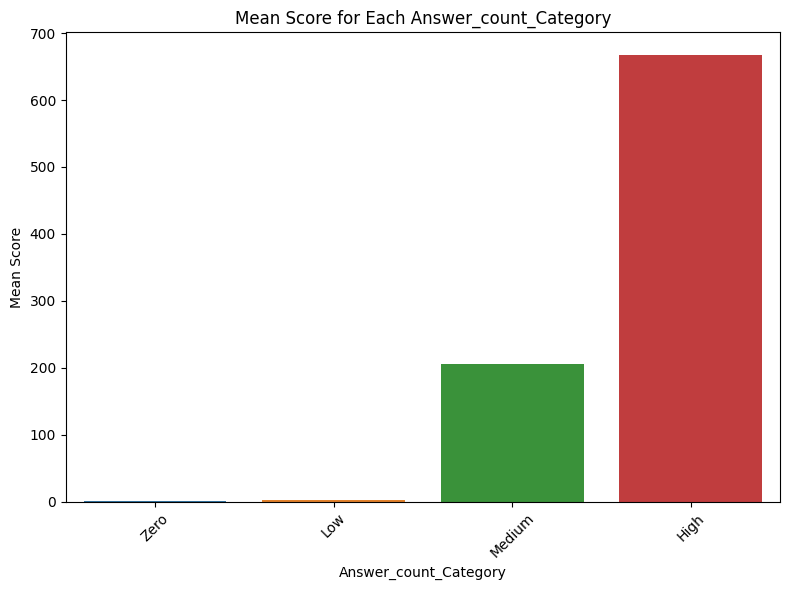

In [ ]:
# Merging questions with answers
merged_Q_A = pd.merge(questions, Q_A, left_on='Id', right_on='QId', how='left')
merged_Q_A = pd.merge(merged_Q_A, answers, left_on='AId', right_on='Id', how='left', suffixes=('_Q', '_A'))

# Counting answers per question
answer_counts = merged_Q_A.groupby('Id_Q').size().reset_index(name='Answer_count')

# Setting 'Answer_count' to zero for questions without answers(questions without answers has AId=-1)
id_no_A = merged_Q_A[merged_Q_A['AId']==-1]['Id_Q'].unique() # id of questions without answer
answer_counts.loc[answer_counts['Id_Q'].isin(id_no_A), 'Answer_count'] = 0

# Merging answer_counts with questions
merged_with_questions = pd.merge(answer_counts, questions, left_on='Id_Q', right_on='Id', how='inner')

# Defining bins and categorizing answer counts
bins = [-1, 0, 20, 50, float('inf')]
labels = ['Zero', 'Low', 'Medium', 'High']
merged_with_questions['Answer_count_Category'] = pd.cut(merged_with_questions['Answer_count'], bins=bins, labels=labels)

# Calculating mean scores for each category
mean_scores = merged_with_questions.groupby('Answer_count_Category')['Score'].mean()

# Plotting the mean scores
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title('Mean Score for Each Answer_count_Category')
plt.xlabel('Answer_count_Category')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print(merged_with_questions['Answer_count'].min())
print(merged_with_questions['Answer_count'].max())

0
100


# Question 9

In [ ]:
questions.columns

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'OwnerUserId',
       'CommentCount', 'ClosedDate', 'FavoriteCount', 'accepted_flag'],
      dtype='object')

In [ ]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = questions['ViewCount'].corr(questions['Score'])
correlation

0.5196124540877628

# Question 10

In [ ]:
users.columns

Index(['Id', 'Reputation', 'Views', 'UpVotes', 'DownVotes'], dtype='object')

In [ ]:
questions.columns

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'OwnerUserId',
       'CommentCount', 'ClosedDate', 'FavoriteCount', 'accepted_flag'],
      dtype='object')

In [ ]:
users.shape

(394061, 5)

In [ ]:
questions.shape

(810071, 9)

In [ ]:
questions['OwnerUserId'].nunique()

270972

In [ ]:
questions[questions['OwnerUserId'].isnull()]

,Id,CreationDate,Score,ViewCount,OwnerUserId,CommentCount,ClosedDate,FavoriteCount,accepted_flag
4,2092,2008-08-05 11:15:17,6,1411,NaN,0,NaN,0,NaN
56,13751,2008-08-17 17:31:38,372,86328,NaN,3,NaN,25,NaN
76,16689,2008-08-19 18:31:32,17,11394,NaN,0,NaN,4,NaN
121,24623,2008-08-23 21:40:11,1,1086,NaN,0,NaN,0,NaN
140,26732,2008-08-25 19:56:38,32,47323,NaN,0,NaN,8,NaN
...,...,...,...,...,...,...,...,...,...
805704,28817184,2015-03-02 18:46:34,0,15,NaN,4,NaN,0,NaN
808004,28873894,2015-03-05 01:12:30,1,34,NaN,2,NaN,0,NaN
808005,28873910,2015-03-05 00:52:47,0,36,NaN,0,NaN,0,NaN
808787,28893866,2015-03-06 07:12:55,0,19,NaN,4,2015-03-06 07:15:41,0,NaN


In [ ]:
# inner : because some questions have no OwnerUserId
merged_Q_U = pd.merge(questions, users, left_on='OwnerUserId', right_on='Id', how='inner')
merged_Q_U

,Id_x,CreationDate,Score,ViewCount,OwnerUserId,CommentCount,ClosedDate,FavoriteCount,accepted_flag,Id_y,Reputation,Views,UpVotes,DownVotes
0,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,NaN,78,286,147,10,2
1,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN,58,12468,991,893,53
2,779403,2009-04-22 21:51:49,3,8315,58.0,0,NaN,3,NaN,58,12468,991,893,53
3,2806416,2010-05-10 20:58:35,1,676,58.0,0,NaN,0,NaN,58,12468,991,893,53
4,4340576,2010-12-02 22:20:22,36,19738,58.0,3,NaN,3,NaN,58,12468,991,893,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800426,28922554,2015-03-08 02:51:24,1,13,4645731.0,1,NaN,0,NaN,4645731,6,0,0,0
800427,28922633,2015-03-08 03:04:28,0,10,3193156.0,0,NaN,0,NaN,3193156,123,4,7,0
800428,28922649,2015-03-08 03:07:12,0,13,4645748.0,0,NaN,0,NaN,4645748,1,0,0,0
800429,28922750,2015-03-08 03:24:14,0,13,4634137.0,4,2015-03-08 03:25:33,0,NaN,4634137,6,0,0,0


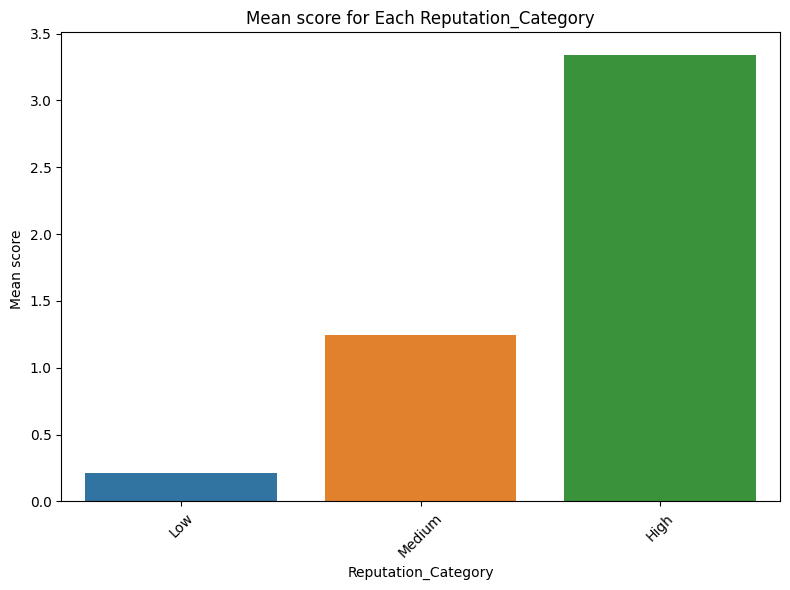

In [ ]:
# Define bins and calculate mean scores for each bin
merged_Q_U['Reputation_Category'] = pd.qcut(merged_Q_U['Reputation'], q=3, labels=['Low', 'Medium', 'High'])
mean_scores = merged_Q_U.groupby('Reputation_Category')['Score'].mean()

# Plotting with mean scores on the y-axis
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title('Mean score for Each Reputation_Category')
plt.xlabel('Reputation_Category')
plt.ylabel('Mean score ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()